In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('quora.csv')

In [4]:
df.head()

,Unnamed: 0,index,id,qid1,qid2,question1,question2,is_duplicate
0,0,8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
1,1,368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
2,2,70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
3,3,226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
4,4,73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    100000 non-null  int64 
 1   index         100000 non-null  int64 
 2   id            100000 non-null  int64 
 3   qid1          100000 non-null  int64 
 4   qid2          100000 non-null  int64 
 5   question1     100000 non-null  object
 6   question2     100000 non-null  object
 7   is_duplicate  100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [6]:
df.isnull().sum()

Unnamed: 0      0
index           0
id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [8]:
df.duplicated().sum()

0

0    62879
1    37121
Name: is_duplicate, dtype: int64


<Axes: >

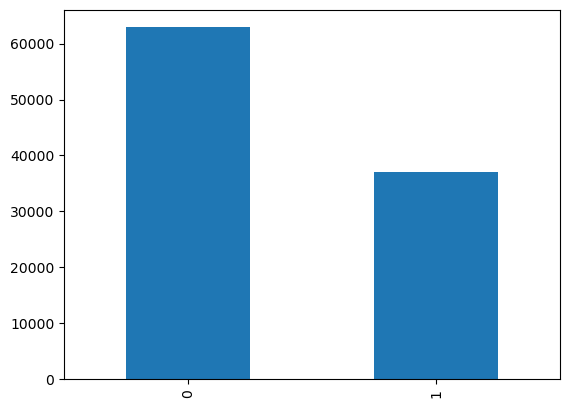

In [9]:
print(df['is_duplicate'].value_counts())
df['is_duplicate'].value_counts().plot(kind='bar')

In [11]:
(df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100

0    62.879
1    37.121
Name: is_duplicate, dtype: float64

In [13]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique Questions = ' , np.unique(qid).shape[0])

Number of unique Questions =  166206


In [14]:
qid

0          15738
1          12736
2         121486
3         254474
4          48103
           ...  
199995    450891
199996    273564
199997    517487
199998     64516
199999    334357
Length: 200000, dtype: int64

In [16]:
x = qid.value_counts()>1
print('Number of Question are repeted = ',x[x].shape[0])

Number of Question are repeted =  19070


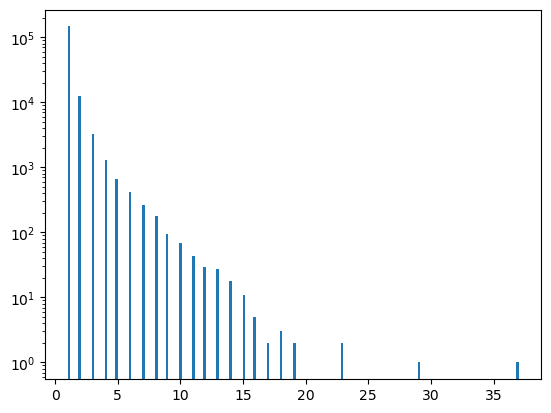

In [17]:
plt.hist(qid.value_counts().values,bins=170)
plt.yscale('log')
plt.show()

In [18]:
df = df.drop('Unnamed: 0',axis=1)

In [19]:
df.head()

,index,id,qid1,qid2,question1,question2,is_duplicate
0,8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
1,368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
2,70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
3,226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
4,73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


In [20]:
df = df.drop('index',axis=1)

In [21]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
1,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
2,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
3,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
4,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


In [22]:
df = df.sample(30000)

In [23]:
que_df = df[['question1','question2']]

In [24]:
que_df.head()

,question1,question2
5417,What is SATs?,What is SAT for?
22243,What websites does investors usually go?,What are some article submission websites apar...
36495,Can I get admission in DU for BA economics If ...,What is the eligibility criteria for economics...
40068,What degree should I have to be a stockbroker?,Can you be a stockbroker without a degree?
26729,How can I learn to speak a fluent English?,How can I understand english?


# Simple Way not doing anything and check the accuracy 

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

queston = list(que_df['question1']) + list(que_df['question2'])

cv = CountVectorizer(max_features=3000)
qu1_arr,qu2_arr = np.vsplit(cv.fit_transform(queston).toarray(),2)

In [26]:
temp_df1 = pd.DataFrame(qu1_arr,index=que_df.index)
temp_df2 = pd.DataFrame(qu2_arr,index=que_df.index)

temp_df = pd.concat([temp_df1,temp_df2],axis=1)

In [27]:
temp_df.shape

(30000, 6000)

In [28]:
temp_df['is_duplicate'] = df['is_duplicate']

In [29]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
5417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36495,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
40068,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
26729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [34]:
rf = RandomForestClassifier()

rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7375

In [35]:
confusion_matrix(y_test,y_pred)

array([[3428,  329],
       [1246,  997]], dtype=int64)

In [37]:
!pip install xgboost

In [39]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred2 = xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.7375

# Now the Improve the Accuraccy by creating new features acording the data

In [40]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [41]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
5417,99340,164926,164927,What is SATs?,What is SAT for?,0,13,16
22243,221102,57593,328355,What websites does investors usually go?,What are some article submission websites apar...,0,40,105
36495,217038,323305,133916,Can I get admission in DU for BA economics If ...,What is the eligibility criteria for economics...,1,73,141
40068,352462,481379,481380,What degree should I have to be a stockbroker?,Can you be a stockbroker without a degree?,0,46,42
26729,140311,4447,1934,How can I learn to speak a fluent English?,How can I understand english?,1,42,29


In [43]:
df.shape

(30000, 8)

In [44]:
df['q1_num_words'] = df['question1'].apply(lambda x: len(x.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda x: len(x.split(" ")))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
5417,99340,164926,164927,What is SATs?,What is SAT for?,0,13,16,3,4
22243,221102,57593,328355,What websites does investors usually go?,What are some article submission websites apar...,0,40,105,6,16
36495,217038,323305,133916,Can I get admission in DU for BA economics If ...,What is the eligibility criteria for economics...,1,73,141,16,27
40068,352462,481379,481380,What degree should I have to be a stockbroker?,Can you be a stockbroker without a degree?,0,46,42,9,8
26729,140311,4447,1934,How can I learn to speak a fluent English?,How can I understand english?,1,42,29,9,5


In [47]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(' ')))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(' ')))
    return len(w1 & w2)

In [48]:
df['common_words'] = df.apply(common_words,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words
5417,99340,164926,164927,What is SATs?,What is SAT for?,0,13,16,3,4,2
22243,221102,57593,328355,What websites does investors usually go?,What are some article submission websites apar...,0,40,105,6,16,2
36495,217038,323305,133916,Can I get admission in DU for BA economics If ...,What is the eligibility criteria for economics...,1,73,141,16,27,11
40068,352462,481379,481380,What degree should I have to be a stockbroker?,Can you be a stockbroker without a degree?,0,46,42,9,8,2
26729,140311,4447,1934,How can I learn to speak a fluent English?,How can I understand english?,1,42,29,9,5,4


In [53]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(' ')))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(' ')))
    return (len(w1) + len(w2))

In [54]:
df['word_total'] = df.apply(total_words,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total
5417,99340,164926,164927,What is SATs?,What is SAT for?,0,13,16,3,4,2,7
22243,221102,57593,328355,What websites does investors usually go?,What are some article submission websites apar...,0,40,105,6,16,2,22
36495,217038,323305,133916,Can I get admission in DU for BA economics If ...,What is the eligibility criteria for economics...,1,73,141,16,27,11,39
40068,352462,481379,481380,What degree should I have to be a stockbroker?,Can you be a stockbroker without a degree?,0,46,42,9,8,2,16
26729,140311,4447,1934,How can I learn to speak a fluent English?,How can I understand english?,1,42,29,9,5,4,14


In [55]:
df['word_share'] = round(df['common_words']/df['word_total'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total,word_share
5417,99340,164926,164927,What is SATs?,What is SAT for?,0,13,16,3,4,2,7,0.29
22243,221102,57593,328355,What websites does investors usually go?,What are some article submission websites apar...,0,40,105,6,16,2,22,0.09
36495,217038,323305,133916,Can I get admission in DU for BA economics If ...,What is the eligibility criteria for economics...,1,73,141,16,27,11,39,0.28
40068,352462,481379,481380,What degree should I have to be a stockbroker?,Can you be a stockbroker without a degree?,0,46,42,9,8,2,16,0.12
26729,140311,4447,1934,How can I learn to speak a fluent English?,How can I understand english?,1,42,29,9,5,4,14,0.29


Minum character in the setnence 4
Maximum character in the setnence 430
Average character in the setnence 59.355466666666665


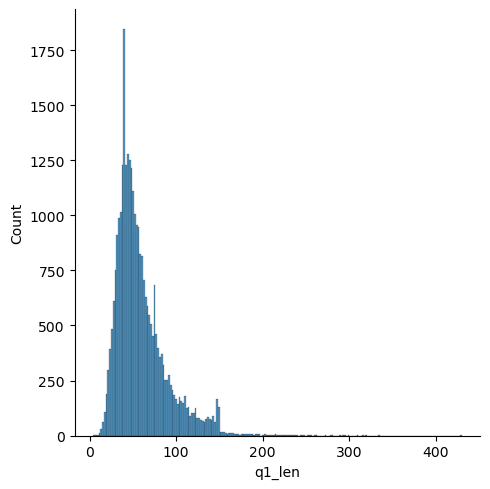

In [57]:
sns.displot(df['q1_len'])
print('Minum character in the setnence',df['q1_len'].min())
print('Maximum character in the setnence',df['q1_len'].max())
print('Average character in the setnence',df['q1_len'].mean())

Minum character in the setnence 1
Maximum character in the setnence 1151
Average character in the setnence 59.78593333333333


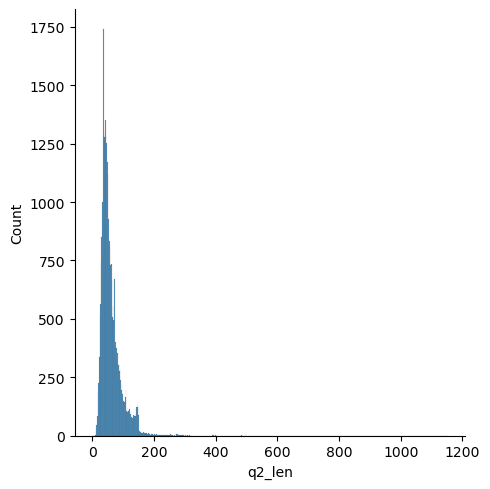

In [58]:
sns.displot(df['q2_len'])
print('Minum character in the setnence',df['q2_len'].min())
print('Maximum character in the setnence',df['q2_len'].max())
print('Average character in the setnence',df['q2_len'].mean())

Minum character in the setnence 1
Maximum character in the setnence 81
Average character in the setnence 10.9206


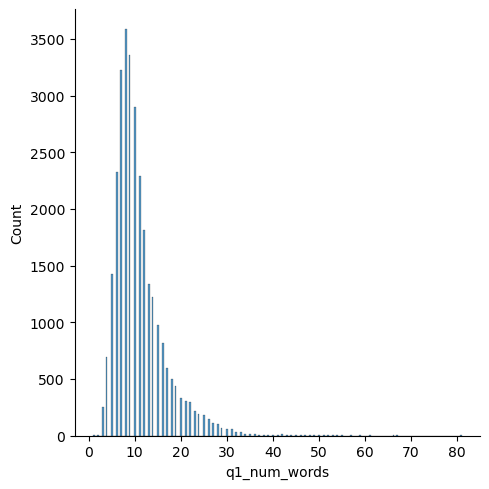

In [59]:
sns.displot(df['q1_num_words'])
print('Minum character in the setnence',df['q1_num_words'].min())
print('Maximum character in the setnence',df['q1_num_words'].max())
print('Average character in the setnence',df['q1_num_words'].mean())

Minum character in the setnence 1
Maximum character in the setnence 237
Average character in the setnence 11.1297


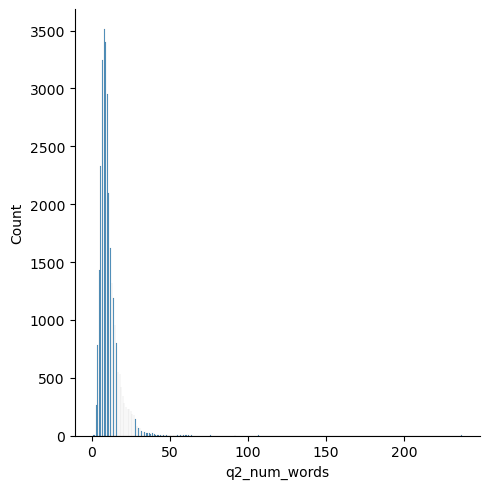

In [60]:
sns.displot(df['q2_num_words'])
print('Minum character in the setnence',df['q2_num_words'].min())
print('Maximum character in the setnence',df['q2_num_words'].max())
print('Average character in the setnence',df['q2_num_words'].mean())

C:\Users\darshil\AppData\Local\Temp\ipykernel_8504\95346685.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 0]['common_words'],label='non_duplicated')
C:\Users\darshil\AppData\Local\Temp\ipykernel_8504\95346685.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[d

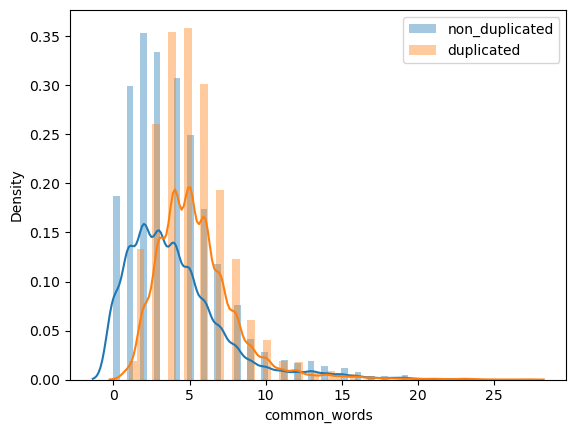

In [64]:
sns.distplot(df[df['is_duplicate'] == 0]['common_words'],label='non_duplicated')
sns.distplot(df[df['is_duplicate'] == 1]['common_words'],label='duplicated')
plt.legend()
plt.show()

C:\Users\darshil\AppData\Local\Temp\ipykernel_8504\2112187708.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 0]['word_total'],label='non_duplicated')
C:\Users\darshil\AppData\Local\Temp\ipykernel_8504\2112187708.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df

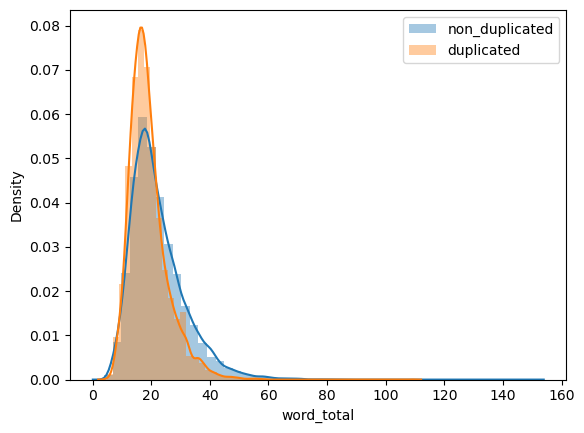

In [65]:
sns.distplot(df[df['is_duplicate'] == 0]['word_total'],label='non_duplicated')
sns.distplot(df[df['is_duplicate'] == 1]['word_total'],label='duplicated')
plt.legend()
plt.show()

C:\Users\darshil\AppData\Local\Temp\ipykernel_8504\3320764760.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 0]['word_share'],label='non_duplicated')
C:\Users\darshil\AppData\Local\Temp\ipykernel_8504\3320764760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df

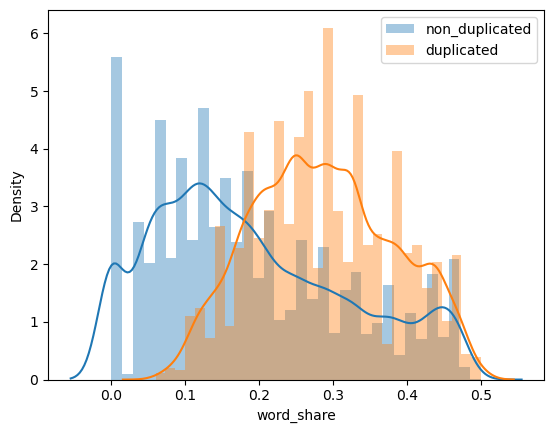

In [66]:
sns.distplot(df[df['is_duplicate'] == 0]['word_share'],label='non_duplicated')
sns.distplot(df[df['is_duplicate'] == 1]['word_share'],label='duplicated')
plt.legend()
plt.show()

In [67]:
q_df = df[['question1','question2']]

In [68]:
q_df.head()

,question1,question2
5417,What is SATs?,What is SAT for?
22243,What websites does investors usually go?,What are some article submission websites apar...
36495,Can I get admission in DU for BA economics If ...,What is the eligibility criteria for economics...
40068,What degree should I have to be a stockbroker?,Can you be a stockbroker without a degree?
26729,How can I learn to speak a fluent English?,How can I understand english?


In [69]:
f_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
f_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total,word_share
5417,0,13,16,3,4,2,7,0.29
22243,0,40,105,6,16,2,22,0.09
36495,1,73,141,16,27,11,39,0.28
40068,0,46,42,9,8,2,16,0.12
26729,1,42,29,9,5,4,14,0.29


In [70]:
f_df.shape

(30000, 8)

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

qu2 = list(q_df['question1']) + list(q_df['question2'])

cv = CountVectorizer(max_features=3000)

q1_arr , q2_arr = np.vsplit(cv.fit_transform(qu2).toarray(),2)

In [72]:
tm_df1 = pd.DataFrame(q1_arr,index=q_df.index)
tm_df2 = pd.DataFrame(q2_arr,index=q_df.index)
tm_df = pd.concat([tm_df1,tm_df2],axis=1)
tm_df.shape

(30000, 6000)

In [73]:
final_df = pd.concat([f_df,tm_df],axis=1)

In [74]:
final_df.shape

(30000, 6008)

In [75]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
5417,0,13,16,3,4,2,7,0.29,0,0,...,0,0,0,0,0,0,0,0,0,0
22243,0,40,105,6,16,2,22,0.09,0,0,...,0,0,0,0,0,0,0,0,0,0
36495,1,73,141,16,27,11,39,0.28,0,0,...,0,0,0,0,0,0,0,0,0,0
40068,0,46,42,9,8,2,16,0.12,0,0,...,0,1,0,0,0,0,0,0,0,0
26729,1,42,29,9,5,4,14,0.29,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2)

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

rf.fit(x_train,y_train)
y_pred_2 = rf.predict(x_test)
accuracy_score(y_test,y_pred_2)

0.7713333333333333

In [79]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred_3 = xgb.predict(x_test)
accuracy_score(y_test,y_pred_3)

0.7731666666666667